In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_data.csv
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-03-02.jpg
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-02-17.jpg
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-02-25.jpg
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-01-03.jpg
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-02-16.jpg
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-01-18.jpg
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-01-20.jpg
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-02-05.jpg
/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-01-10.jpg
/kaggle/input/astronomy-picture-of-the-day-da

**SIFT** 
The Scale-Invariant Feature Transform (SIFT) algorithm is a computer vision algorithm used for identifying and matching local features, such as corners or blobs, in images. It was first described in a paper by David Lowe in 1999. The SIFT algorithm is invariant to image scale and rotation. SIFT is widely used in image matching, object recognition and image registration apllications. 

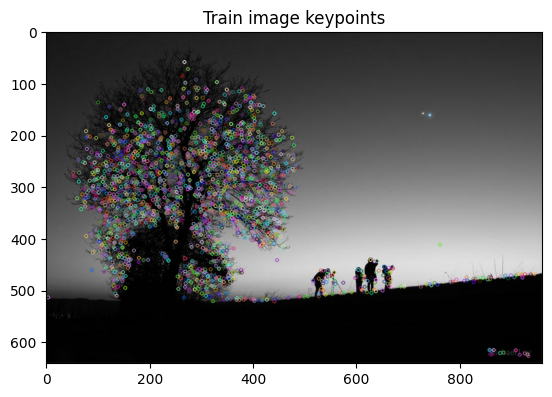

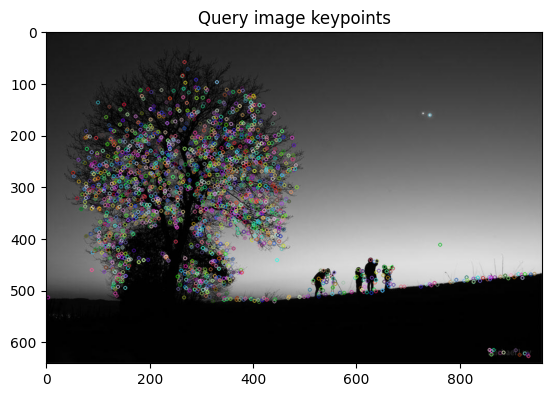

In [2]:
# SIFT implementation with OpenCV
import cv2
import numpy as np
import matplotlib.pyplot as plt

train_img = cv2.imread ('/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-03-15.jpg')
query_img = cv2.imread ('/kaggle/input/astronomy-picture-of-the-day-data-collection/apod_images/apod_images/2023-03-15.jpg')

# turn images to grayscale
def to_gray (color_img):
    gray = cv2.cvtColor (color_img, cv2.COLOR_BGR2GRAY)
    return gray

train_img_gray = to_gray (train_img)
query_img_gray = to_gray (query_img)

# initialize SIFT detector
sift = cv2.SIFT_create ()

# generate SIFT keypoints and descriptors
train_kp, train_desc = sift.detectAndCompute (train_img_gray, None)
query_kp, query_desc = sift.detectAndCompute (query_img_gray, None) 

plt.figure (1)
plt.imshow ((cv2.drawKeypoints (train_img_gray, train_kp, train_img.copy ())))
plt.title ('Train image keypoints')

plt.figure (2)
plt.imshow ((cv2.drawKeypoints (query_img_gray, query_kp, query_img.copy ())))
plt.title ('Query image keypoints')

plt.show ()

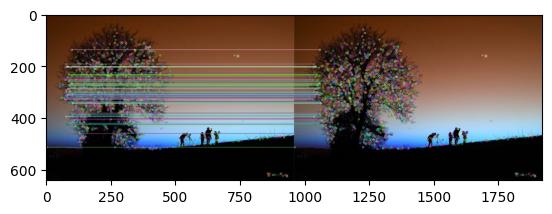

In [3]:
# create a BFmatcher object which will match up the SIFT features
bf = cv2.BFMatcher (cv2.NORM_L2, crossCheck = True)
matches = bf.match (train_desc, query_desc)

# sort the matches in the order of their distance
matches = sorted (matches, key = lambda x:x.distance)

# draw the top N matches
N_MATCHES = 100

match_img = cv2.drawMatches (train_img, train_kp,
                             query_img, query_kp,
                             matches [:N_MATCHES], query_img.copy (), flags = 0)

plt.figure (3)
plt.imshow (match_img)
plt.show ()